In [1]:
%matplotlib inline

## Diferenciação numérica

In [2]:
import numpy as np 
import sympy as sy
import matplotlib.pyplot as plt

### Motivação

Gerando curvas de deslocamento, velocidade e aceleração para uma partícula.

In [2]:
# eixo temporal
x = np.linspace(0,1,30,endpoint=True)

# lei de movimento
y = 0.93*np.cos(2.5*(x-1))*np.sin(6*x*x)

# velocidade e aceleração (funções analíticas)
# derivação simbólica
t = sy.Symbol('t')
st = 0.93*sy.cos(2.5*(t-1))*sy.sin(6*t*t)
dt = sy.diff(st,t) # v(t)
dt2 = sy.diff(dt,t) # a(t)

# converte para numérico
dy = np.asarray([dt.subs(t,xn) for xn in x])
dy2 = np.asarray([dt2.subs(t,xn) for xn in x])

# função para plotagem
def plotting(x,y,c,lab):
    plt.plot(x,y,c,label=lab)
    plt.grid()
    plt.xlabel('$t$')
    plt.tick_params(
        axis='both',        
        which='both',      
        bottom=False,      
        left=False,         
        labelbottom=False, 
        labelleft=False)
    plt.legend()
    ax = plt.gca()
    ax.set_facecolor('#F9F9F9')

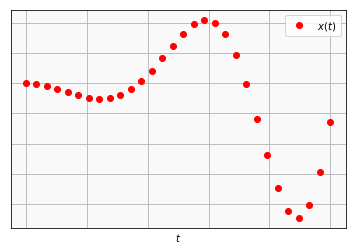

In [4]:
# curva: deslocamento
plotting(x,y,'or','$x(t)$')

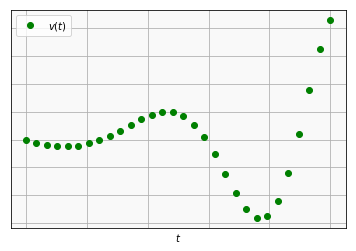

In [5]:
# curva: velocidade
plotting(x,dy,'og','$v(t)$')

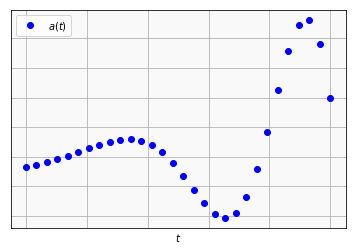

In [6]:
# curva: aceleração
plotting(x,dy2,'ob','$a(t)$')

# Derivada numérica progressiva e regressiva (primeira ordem)

h=0.000
f'e(2.3) = -0.66627602
f'p(2.3) = -0.66631331
f'r(2.3) = -0.66623873
f'c(2.3) = -0.66627602


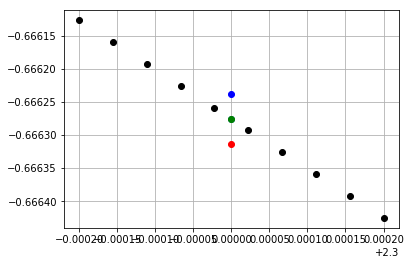

In [77]:
x0 = 2.3
h = 0.0001
n = 10
x = np.linspace(x0-2*h,x0+2*h,n)
f = np.sin(x)
df = np.cos(x)
dfe = np.cos(x0)
dfp = (np.sin(x0+h) - np.sin(x0))/h
dfr = (np.sin(x0) - np.sin(x0-h))/h
dfc = (np.sin(x0+h) - np.sin(x0-h))/(2*h)

plt.plot(x,df,'ok') # derivada exata
plt.plot(x0,dfe,'o') # derivada exata no ponto x0
plt.plot(x0,dfp,'or') # derivada numérica PROGRESSIVA no ponto x0 
plt.plot(x0,dfr,'ob') # derivada numérica REGRESSIVA no ponto x0 
plt.plot(x0,dfc,'og') # derivada numérica REGRESSIVA no ponto x0 
plt.grid(True)

print('h={0:.3f}'.format(h))
print('f\'e({0:g}) = {1:.8f}'.format(x0,dfe))
print('f\'p({0:g}) = {1:.8f}'.format(x0,dfp))
print('f\'r({0:g}) = {1:.8f}'.format(x0,dfr))
print('f\'c({0:g}) = {1:.8f}'.format(x0,dfc))

## Comparando resultados

**Exemplo:** considere a função $f(x) = \frac{2^x}{x}$. Calcule a segunda derivada em $x=2$ numericamente com a fórmula de diferença centrada a 3 pontos usando:

- Os pontos $x = 1.8$, $x = 2$ e $x = 2.2$.
- Os pontos $x = 1.9$, $x = 2$ e $x = 2.1$.

Compare os resultados com a derivada analítica.

### Solução

Vamos primeiro computar a seguda derivada analítica de $f(x)$ por computação simbólica.

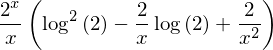

In [7]:
from sympy.abc import x 
sy.init_printing()

# função
f = 2**x/x

# derivada segunda
d2fdx2 = sy.diff(f,x,2)
d2fdx2

In [8]:
# derivada em x = 2 
d2fdx2_p2 = d2fdx2.subs(x,2)
d2fdx2_p2

In [9]:
# valor numérico
d2fdx2_p2_num = float(d2fdx2_p2)
d2fdx2_p2_num 

Agora, vamos montar uma função para a fórmula da segunda derivada a 3 pontos (supondo que os pontos dados sejam igualmente espaçados:

In [17]:
# função 
def der_num_2(x1,x2,x3):
    d2fdx2_num = lambda x1,x2,x3: (f.subs(x,x1) - 2*f.subs(x,x2) + f.subs(x,x3))/(x2 - x1)**2
    return float(d2fdx2_num(x1,x2,x3))

Aplicamos a nossa aproximação numérica ao primeiro conjunto de pontos para estimar a derivada numérica no ponto $x=2$ por diferença centrada.

In [19]:
df2_1 = der_num_2(1.8,2.0,2.2)
df2_1

Em seguida, aplicamos a nossa aproximação numérica ao segundo conjunto de pontos:

In [20]:
df2_2 = der_num_2(1.9,2.0,2.1)
df2_2

Esperamos que o segundo conjunto de pontos nos dê uma estimativa mais próxima para a derivada analítica já que os pontos estão mais próximos um do outro. Para verificar isto, vamos medir o erro relativo percentual entre as derivadas numéricas e a derivada analítica.

In [25]:
# erro relativo percentual 
erp = lambda v,va: abs(v-va)/abs(v)*100

# erro para o grupo 1
print('erro relativo percentual 1: ' + str(erp(d2fdx2_p2_num,df2_1)) + '%' )

# erro para o grupo 2
print('erro relativo percentual 2: ' + str(erp(d2fdx2_p2_num,df2_2)) + '%' )

erro relativo percentual 1: 0.49948640831095764%
erro relativo percentual 2: 0.12404011077131777%
